# Linear Algebra Concepts Every Data Scientist Should Know


Key Definition $\mathbb{F}$ denotes $\mathbb{R}$ or $\mathbb{C}$

# Vectors
A vector is a list of numbers. There are (at least) two ways to interpret what this list of numbers mean.
- One way to think of the vector as being a point in a space. Then this list of numbers is a way of identifying that point in space, where each number represents the vector’s component in that dimension. 
- Another way to think of a vector is a magnitude and a direction, e.g. a quantity like velocity (“the fighter jet’s velocity is 250 mph north-by-northwest”). In this way of think of it, a vector is a directed arrow pointing from the origin to the end point given by the list of numbers.

## Unit Vector
A unit vector is a vector with a magnitude of 1. It is often used to represent the direction of a vector without regard to its magnitude. To convert a vector into a unit vector, we can divide the vector by its magnitude.

### Example
Given a vector 
$ \vec{a} =
\begin{bmatrix}
    3\\
    4
\end{bmatrix}
$, we can calculate the magnitude $|\vec{a}| = \sqrt{3^2+4^2} = 5$. Dividing the vector by the magnitude gives us $\frac{\vec{a}}{|\vec{a}|} = 
\begin{bmatrix}
    0.6\\
    0.8
\end{bmatrix}
$

Unit Vector of A: tensor([0.6000, 0.8000])


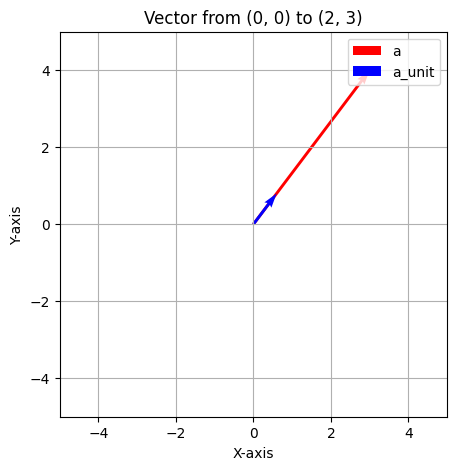

In [1]:
import torch
import matplotlib.pyplot as plt

# Define the tensor using PyTorch
a = torch.tensor([3, 4], dtype=torch.float32)
a_unit = a / torch.norm(a)

print("Unit Vector of A:", a_unit)

# Plotting the vector
plt.figure(figsize=(5, 5))
plt.quiver(0, 0, a[0].item(), a[1].item(), angles='xy', scale_units='xy', scale=1, color='r', label='a')  # Red vector
plt.quiver(0, 0, a_unit[0].item(), a_unit[1].item(), angles='xy', scale_units='xy', scale=1, color='b', label='a_unit')  # blue vector
plt.xlim(-5, 5)  # Set x-axis limit
plt.ylim(-5, 5)  # Set y-axis limit
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Vector from (0, 0) to (2, 3)')
plt.grid(True)
plt.show()

# Vector Operations

## Vector Addition
The addition of two vectors to form a new vector, component-wise.
$$
\vec{a} + \vec{b} = 
\begin{bmatrix}
    a_x\\
    a_y\\
    a_z
\end{bmatrix} + 
\begin{bmatrix}
    b_x\\
    b_y\\
    b_z
\end{bmatrix} = 
\begin{bmatrix}
    a_x+b_x\\
    a_y+b_y\\
    a_z+b_z
\end{bmatrix}
$$

### Example 
Given $\vec{a}$ and $\vec{b} =
\begin{bmatrix}
    2\\
    1
\end{bmatrix}
$, $\vec{a} + \vec{b} = 
\begin{bmatrix}
    3+2\\
    4+1
\end{bmatrix}=
\begin{bmatrix}
    5\\
    5
\end{bmatrix}
$


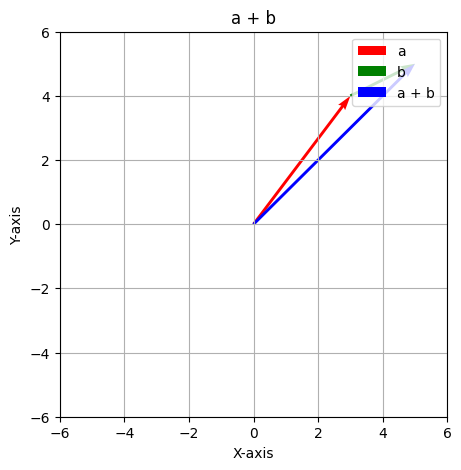

In [2]:
b = torch.tensor([2, 1], dtype=torch.float32)
c = a + b

plt.figure(figsize=(5, 5))
plt.quiver(0, 0, a[0].item(), a[1].item(), angles='xy', scale_units='xy', scale=1, color='r', label='a') 
plt.quiver(3, 4, b[0].item(), b[1].item(), angles='xy', scale_units='xy', scale=1, color='g', label='b')
plt.quiver(0, 0, c[0].item(), c[1].item(), angles='xy', scale_units='xy', scale=1, color='b', label='a + b')  
plt.xlim(-6, 6) 
plt.ylim(-6, 6)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('a + b')
plt.legend()
plt.grid(True)
plt.show()

## Scalar Multiplication
Multiplication of a vector by a scalar that results in the vector with the same direction (or opposite if the scalar is negative as teh original vector) but with a magnitude that is scaled by the absolute value of the scalar.

### Example
$2\vec{b} = 2 
\begin{bmatrix}
    2\\
    1
\end{bmatrix} =
\begin{bmatrix}
    4\\
    2
\end{bmatrix}
$

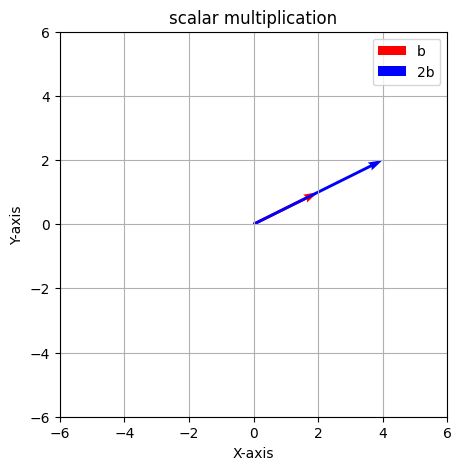

In [3]:
b_new = 2 * b

plt.figure(figsize=(5, 5))
plt.quiver(0, 0, b[0].item(), b[1].item(), angles='xy', scale_units='xy', scale=1, color='r', label='b') 
plt.quiver(0, 0, b_new[0].item(), b_new[1].item(), angles='xy', scale_units='xy', scale=1, color='b', label='2b')  
plt.xlim(-6, 6) 
plt.ylim(-6, 6)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('scalar multiplication')
plt.legend()
plt.grid(True)
plt.show()

## Dot Product
Product of the Euclidian magnitudes of two vectors and the cosine of the angle between them, reflecting both the length of the vectors and their directional relationship. 

Intuitively, think of it as applying the directional growth of one vector to another or “How much push/energy is one vector giving to the other?”. The result is how much stronger we’ve made the original vector (positive, negative, or zero)

$$\vec{a} \cdot \vec{b} = a_x \cdot b_x + a_y \cdot b_y = |\vec{a}||\vec{b}|\cos(\theta)$$

If the dot product is 0, it tells us that the vectors are orthogonal. 
$$\vec{x} \cdot \vec{y} = |\vec{x}||\vec{y}|\cos(90) = 0$$

### Example
$\vec{a} \cdot \vec{b} = 
\begin{bmatrix}
    3\\
    4
\end{bmatrix} \cdot
\begin{bmatrix}
    2\\
    1
\end{bmatrix} =  3 \cdot 2 + 4 \cdot 1 =10
$

In [4]:
print(torch.dot(a,b)) # 3 * 2 + 4 * 1 = 10

tensor(10.)


# Vector Space
Let $V$ be a set on which two operations (vector addition and scalar multiplication) are defined. If the listed axioms are satisfied for every $\vec{u}$, $\vec{v}$, and $\vec{w}$ in every $V$ and every scalar (real number) $\textit{c}$ and $\textit{d}$, then V is called a vector space.
- Addition
  - Closure under addition: $\vec{u} + \vec{v}$ is in $V$.
  - Commutative property: $\vec{u} + \vec{v}$ = $\vec{v} + \vec{u}$
  - Associative property: $\vec{u} + (\vec{v} + \vec{w})$ = $(\vec{u} + \vec{v}) + \vec{w}$
  - Additive identity: $V$ has a zero vector 0 such that for every $u$ in $V$, $\vec{u} + \vec{0} = \vec{u}$ 
  - Additive inverse: For every $\vec{u}$ in $V$, there is a vector in $V$ denoted by $-\vec{u}$ such that $\vec{u} + (-\vec{u}) = 0$
- Scalar Multiplication
  - Closure under scalar multiplication: $\textit{c}\vec{u}$ is in $V$.
  - Distributive property: $\textit{c}(\vec{u} + \vec{v}) = \textit{c}\vec{u} + \textit{c}\vec{v}$
  - Distributive property: $(\textit{c} + \textit{d})\vec{u} = \textit{c}\vec{u} + \textit{d}\vec{u}$
  - Associative property: $\textit{c}(\textit{d}\vec{u}) = (\textit{cd})\vec{u}$
  - Scalar identity: $1(\vec{u}) = \vec{u}$

TLDR: A vector (or linear) space is any collection of vectors that can be added together and multiplied ("scaled") by scalars. This space must satisfy a couple axioms to be called a vector space. IN other words a vector space consists of a set of vectors and all linear combinations of these vectors. Examples include $\mathbb{R}$ and $\mathbb{R^3}$.

##

## Null Space (kernel)
Ref: https://math.unm.edu/~loring/links/linear_s06/nullity.pdf

The null space is a set of vectors that, when multiplied by the matrix, results in a zero vector. It represents the solution of the equation $Ax = 0$, where A is the given matrix.

Imagine a 2D space with two vectors; the null space of a matrix can be visualized as a subspace that collapses these vectors to the zero vector when multiplied by the matrix.

The basis of the null space of matrix $A$ is found by solving $Ax=0$. The general strategy is to: 
- Use row operations to reduced echelon form.
- Write out corresponding simplified equations for the null space.
- Set first free variable to 1, the others to 0. This solution x is a basis element.
- Repeat (b), so each free variable takes its trun being the only 1.

We can also find the nullity, which is the dimension of the null space by:
- Use row operations just to echelon form.
- Count the non-pivot columns.

NOte: We can also find a orthonormal basis for the null space of A, by taking the right singular vectors (the last columns of $V$ or the last rows of $V^T$) provided by the Singular Value Decomposition algorithm. (shown below)

### Example
Given that $A = 
\begin{bmatrix}
    1 & 2\\
    2 & 4
\end{bmatrix} 
$, the RREF of A is $
\begin{bmatrix}
    1 & 2\\
    0 & 0
\end{bmatrix} 
$.
to find the null space, solve the matrix equation $
\begin{bmatrix}
    1 & 2\\
    0 & 0
\end{bmatrix} 
\begin{bmatrix}
    x_1\\
    x_2
\end{bmatrix} = 
\begin{bmatrix}
    0\\
    0
\end{bmatrix}  
$
If we take $x_2=t$, then $x_1=-2t$. Thus, $\vec{x} = 
\begin{bmatrix}
    -2\\
    1
\end{bmatrix}t 
$, which is the null space. The nullity of the matrix is the dimension of the basis for the null space, which is 1. The basis of the null space is $\begin{Bmatrix}\begin{bmatrix}
    -2\\
    1
\end{bmatrix} 
\end{Bmatrix}
$

In [5]:
A = torch.tensor([[1, 2], [2, 4]], dtype=torch.float32)
print("A:", A, end='\n\n')

# Perform Singular Value Decomposition (SVD)
U, S, Vh = torch.linalg.svd(A)

print("U:", U,)
print("S:", S)
print("Vh:", Vh, end='\n\n')
# The null space corresponds to the last column of Vh
# For a 2x2 matrix, if the rank is 1, the last column of Vh is the null space
null_space = Vh[-1]

print("Null Space:", null_space, end='\n\n')

print("Checking the decomposition matrices multiply to the original:")
print(U @ torch.diag(S) @ Vh)

A: tensor([[1., 2.],
        [2., 4.]])

U: tensor([[-0.4472, -0.8944],
        [-0.8944,  0.4472]])
S: tensor([5.0000e+00, 4.8449e-09])
Vh: tensor([[-0.4472, -0.8944],
        [ 0.8944, -0.4472]])

Null Space: tensor([ 0.8944, -0.4472])

Checking the decomposition matrices multiply to the original:
tensor([[1.0000, 2.0000],
        [2.0000, 4.0000]])


## Span
The set of all possible vectors you can reach given a linear combination. In other words, the vector space $S = \text{span}(\vec{v_1},\vec{v_2})$ consists of all vectors of the form $\vec{v} = \alpha \vec{v_1}+\beta \vec{v_2}$, where $\alpha$ and $\beta$ are real numbers. 

Theorems:
The span of a list of vectors in $V$ is the smallest subspace of $V$ containing all the vectors in the list.

The vectors span the entire 2D space.


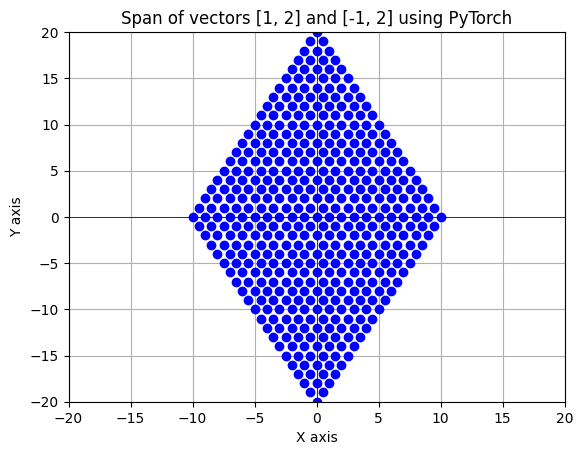

In [6]:
# Define the vectors as PyTorch tensors
v1 = torch.tensor([1, 2], dtype=torch.float32)
v2 = torch.tensor([-1, 2], dtype=torch.float32)

# Form the matrix with v1 and v2 as columns
matrix = torch.stack((v1, v2), dim=1)

# Calculate the determinant
determinant = torch.linalg.det(matrix)

# Check if the determinant is non-zero
if determinant.item() != 0:
    print("The vectors span the entire 2D space.")
else:
    print("The vectors do not span the entire 2D space.")
    
# Create a grid of points in the span
fig, ax = plt.subplots()
for a in torch.linspace(-5, 5, 21):
    for b in torch.linspace(-5, 5, 21):
        # Compute the linear combination using tensors
        result = a * v1 + b * v2
        
        # Plot the result
        ax.plot(result[0].item(), result[1].item(), 'bo')  # Convert tensor to item for plotting

# Setting up plot limits
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.grid(True)

# Labels and title
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Span of vectors [1, 2] and [-1, 2] using PyTorch')

# Show plot
plt.show()

## Basis

The basis is a set of linearly independent vectors that span the entire vector space. This means every vector in the vector space can eb expressed as a linear combination of the basis vector. Think of them as building blocks for all other vectors in the space. Most pairs of basis vectors can span the entire two-dimensional sheet of space.

In other words, A basis of $V$ is a list of vectors in $V$ that is linearly independent and spans $V$. Intuitively, a basis is any set of vectors that can be used as a coordinate
system for a vector space.

Theorems:
- Criterion for basis: A list $v_1,...,v_n$ of vectors in V is a basis of V if and only if every $v \in V$ can be written uniquely in the form 
$$v=a_1v_1+...+a_nv_n$$
where $a_1,...,a_n \in \mathbb{F}$
- Every spanning list in a vector space can be reduced to a basis of the vector space.
- Every finite-dimensional vector space has a basis
- Every linearly independent list of vectors in a finite-dimensional vector space can be extended to a basis of the vector space.
- Every subspace of $V$ is part of a direct sum equal to $V$

To find the basis, you can either use the SVD algorithm, or you can find the row space of the matrix whose rows are the given vectors. To do that, find the RREF of the matrix, and the row space is a space spanned by the nonzero rows of the reduced matrix.



In [7]:
def find_basis(vectors):
    # Stack all tensors to form a matrix where each vector is a column
    matrix = torch.stack(vectors, dim=1)
    
    # Perform Singular Value Decomposition
    U, S, V = torch.svd(matrix)
    
    # Tolerance to consider singular values as non-zero (numerical stability)
    tol = max(matrix.shape) * torch.max(S) * 1e-7
    
    # Rank is determined by the number of significant singular values
    rank = torch.sum(S > tol).item()
    
    # Basis vectors are the first 'rank' columns of U
    basis = U[:, :rank]
    
    return basis

# Example usage
v1 = torch.tensor([1.0, 2.0, 3.0])
v2 = torch.tensor([2.0, 4.0, 6.0])
v3 = torch.tensor([3.0, 6.0, 9.0])

basis = find_basis([v1, v2, v3])
print("Basis of the spanned space:")
print(basis)

Basis of the spanned space:
tensor([[-0.2673],
        [-0.5345],
        [-0.8018]])


## Linear Independence

A set of vectors is linearly independent if no vectors in the set can be written as a linear combination of others. The official definition is as follows: A list $v_1,...,v_m$ of vectors in $V$ is called linearly independent if the only choice of $a_1,...,a_m \in F$ that makes $a_1v_1+...+a_mv_m=0$ is $a_1=...=a_m=0$

### Theorems
- Suppose $v_1,...,v_m$ is a linear dependent list in $V$. Then there exists $j \in {1,2,...,m}$ such that the following hold
  - $v_j \in \text{span}(v_1, ..., v_{j-1})$
  - if the jth term is removed from $v_1, ..., v_{m}$, the span of the remaining list equals $\text{span}(v_1, ..., v_{m})$
- In a finite-dimensional vector space, the length of every linearly independent list of vectors is less than or equal to the length of every spanning list of vectors.
- Every subspace of a finite-dimensional vector space is finite-dimensional.

### How to find linear independence
The rank is the maximum number of linearly independent columns in a matrix and so it follows that the rank is equal to the number of pivots in reduced row echelon form. If the number of columns in a matrix is equal to the rank, then the matrix is linearly independent. Otherwise, the matrix is linearly dependent.

In [8]:
def are_linearly_independent(tensors):
    # Stack the tensors vertically to create a matrix
    matrix = torch.stack(tensors, dim=0)

    # Compute the rank of the matrix
    rank = torch.linalg.matrix_rank(matrix)

    # Check if the rank equals the number of tensors
    return rank == len(tensors)

# Example usage:
# Example usage
v1 = torch.tensor([1.0, 0.0])
v2 = torch.tensor([0.0, 1.0])

print("Are the tensors linearly independent?", are_linearly_independent([v1,v2]))

Are the tensors linearly independent? tensor(True)


# Matrix

Let $m$ and $n$ denote positive integers. An $m \times n$ matrix $A$ is a rectangular array of elements of $\mathbb{F}$ with m rows and n columns. The notation $A_{j,k}$ denotes the entry in row $j$, column $k$ of $A$. In other words, the first index refers to the row number and the second index refers to the column number.

## Matrices as linear maps
A matrix can represent a linear transformation, which is a mapping between two vector spaces that preserves the operations of vector addition and scalar multiplication. In other words, applying a matrix $A$ to vector $x$ to get vector $y$ via $Ax=y$ is a linear transformation

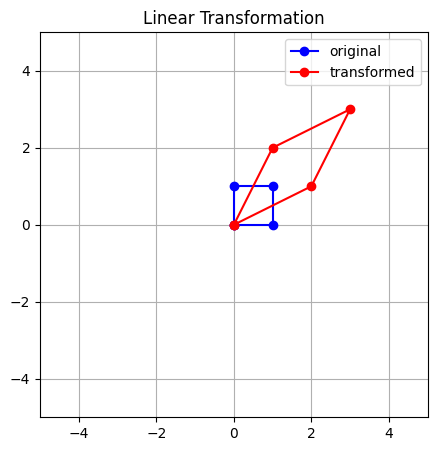

In [9]:
# Linear Transformation of a Square
T = torch.tensor([[1, 2], [2, 1]], dtype=torch.float)  # Transformation matrix
square = torch.tensor([[0, 0, 1, 1, 0], [0, 1, 1, 0, 0]], dtype=torch.float)  # Original square
transformed_square = torch.matmul(T, square)  # Apply transformation

# Plot Original and Transformed Square
plt.figure(figsize=(5, 5))

plt.plot(square[0], square[1], 'o-', color='blue', label="original")  # Convert tensor to numpy for plotting
plt.plot(transformed_square[0], transformed_square[1], 'o-', color='red', label="transformed")  # Convert tensor to numpy for plotting

plt.title('Linear Transformation')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()
plt.grid(True)
plt.show()

## Identity Matrix

The identity matrix is a square matrix with values of one on the diagonals and zero everywhere else. It acts as a multiplicative identity in matrix multiplication, leaving any matrix unchanged by it, just like the number 1.

In [10]:
print(torch.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


## Diagonal Matrix

A diagonal matrix is a square matrix where all entries outside the main diagonal are zero. It is used in finding eigenvalues, and for calculating the determinant.

In [11]:
print(torch.diagflat(torch.tensor([1, 2, 3])))

tensor([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]])


## Inverse Matrix

A matrix, when multiplied by its inverse, results in the identity matrix. The matrix inverse is useful for solving matrix equations. Whenever we want to get rid of the matrix A in some matrix equation, we can "hit" A
with its inverse $A^{−1}$ to make it disappear. For example, to solve for the matrix $X$ in the equation $XA = B$, multiply both sides of the equation by $A^{−1}$ from the right: $X = B^{A−1}$. To solve for $X$ in $ABCXD = E$, multiply both sides of the equation by $D^{−1}$ on the right and by $A^{−1}$, $B^{−1} and $C^{−1}$ (in that order) from the left: $X = C^{−1}B^{−1}A^{−1}ED^{−1}$

### How to Calculate (Gaussian-Jordan method)
- Ensure the matrix $A$ is a square matrix (i.e., it has the same number of rows and columns).
- Confirm that the matrix $A$ is invertible, by computing the determinant of the matrix $A$. If the determinant is zero, the matrix is not invertible (a singular matrix).
- Augment it with the identity matrix and reduce the left side to RREF. The right side is your inverse.

### Example 
Start by creating an array containing the entries of the matrix $A$ on the left side and the identity matrix on the right side
$$
\left[\hspace{-5pt}\begin{array}{cc|cc}
  1 & 2 & 1 & 0\\
  3 & 9 & 0 & 1\\
\end{array}\hspace{-5pt}\right]
$$

- $R_2 \leftarrow R_2 - 3R_1$

$$
\left[\hspace{-5pt}\begin{array}{cc|cc}
  1 & 2 & 1 & 0\\
  0 & 1 & -3 & 1\\
\end{array}\hspace{-5pt}\right]
$$

- $R_2 \leftarrow \frac{1}{3} R_2$

$$
\left[\hspace{-5pt}\begin{array}{cc|cc}
  1 & 2 & 1 & 0\\
  0 & 1 & -1 & \frac{1}{3}\\
\end{array}\hspace{-5pt}\right]
$$

- $R_1 \leftarrow R_1 - 2R_2$
$$
\left[\hspace{-5pt}\begin{array}{cc|cc}
  1 & 0 & 3 & -\frac{2}{3}\\
  0 & 1 & -1 & \frac{1}{3}\\
\end{array}\hspace{-5pt}\right]
$$

In [12]:
print(torch.linalg.inv(torch.tensor([[1, 2], [3, 9]], dtype=torch.float32))) 

try:
    print(torch.linalg.inv(torch.tensor([[1, 2], [2, 4]], dtype=torch.float32))) 
except torch.linalg.LinAlgError as e:
    print("Matrix is singular and cannot be inverted.")

tensor([[ 3.0000, -0.6667],
        [-1.0000,  0.3333]])
Matrix is singular and cannot be inverted.


## Orthogonal Matrix

A square matrix with real elements is considered orthogonal if its transpose equals its inverse.
Formally, a matrix A is orthogonal if $A^TA=AA^T=I$, where $I$ is the identity matrix.

Geometrically, a matrix is orthogonal if its columns and rows are orthogonal unit vectors, a.k.a. they are mutually perpendicular and have a magnitude of 1.

In [13]:
def is_orthogonal(matrix, tol=1e-6):
    if matrix.size(0) != matrix.size(1):
        raise ValueError("The matrix must be square.")
    # Compute the matrix transpose
    matrix_t = matrix.t()
    # Calculate the product of matrix and its transpose
    product = torch.mm(matrix_t, matrix)
    # Create an identity matrix of the same size as the input matrix
    identity = torch.eye(matrix.size(0), dtype=matrix.dtype, device=matrix.device)
    # Check if the product is close to the identity matrix
    return torch.allclose(product, identity, atol=tol)

# Example usage
A = torch.tensor([[1.0, 0.0], [0.0, 1.0]])
print(is_orthogonal(A))  # Output: True

B = torch.tensor([[1.0, 2.0], [2.0, 1.0]])
print(is_orthogonal(B))  # Output: False

True
False


## Matrix Multiplication
Suppose $A$ is an $m \times n$ matrix and $C$ is an $n \times p$ matrix. Then AC is defined to be the $m \times n$ matrix whose entry in row $j$, column $k$, is given by the following equation:

$$(AC)_{j,k} = \sum^{n}_{r=1}A_{j,r}C_{r,k}$$

In other words, the entry in row $j$, column $k$, of AC is computed by taking row $j$ of $A$ and column $k$ of $C$, multiplying together corresponding entries, and then summing.

### Example
$$
\text{Inputs} = A = 
\begin{bmatrix}
\text{input1} & \text{input2}
\end{bmatrix} =
\begin{bmatrix}
a & x\\
b & y\\
c & z
\end{bmatrix}
$$
$$
\text{Operations} = M = 
\begin{bmatrix}
\text{operation1} \\
\text{operation2}
\end{bmatrix} =
\begin{bmatrix}
3 & 4 & 5\\
3 & 0 & 0
\end{bmatrix}
$$

After pouring in the inputs into the operations, you get this
$$
\begin{bmatrix}
3 & 4 & 5\\
3 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
a & x\\
b & y\\
c & z
\end{bmatrix} = 
\begin{bmatrix}
3a+4b+5c & 3x+4y+5z\\
3a & 3x
\end{bmatrix}
$$

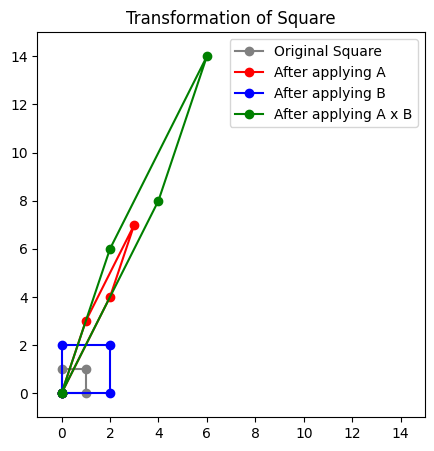

In [14]:
# Original square defined by its corners
square = torch.tensor([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]], dtype=torch.float32)

# Matrices A and B
A = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
B = torch.tensor([[2, 0], [0, 2]], dtype=torch.float32)

# Apply matrix A and B transformations
transformed_square_A = torch.matmul(A, square)
transformed_square_B = torch.matmul(B, square)

# Apply matrix A then B transformation (A x B)
transformed_square_AB = torch.matmul(A, transformed_square_B)

# Plotting all in one plot
plt.figure(figsize=(5, 5))

# Original Square
plt.plot(square[0], square[1], 'o-', color='grey', label='Original Square')

# Square after applying matrix A
plt.plot(transformed_square_A[0], transformed_square_A[1], 'o-', color='red', label='After applying A')

# Square after applying matrix B
plt.plot(transformed_square_B[0], transformed_square_B[1], 'o-', color='blue', label='After applying B')

# Square after applying matrix A then B
plt.plot(transformed_square_AB[0], transformed_square_AB[1], 'o-', color='green', label='After applying A x B')

plt.title('Transformation of Square')
plt.xlim(-1, 15)
plt.ylim(-1, 15)
plt.legend()
plt.show()

## Trace
The trace of a matrix is the sum of all its diagonal elements. It is invariant under the change of basis and provides value information about the matrix, i.e., the trace is the sum of the eigenvalues of a matrix.

$$Tr[A] = \sum^{n}_{i=1}a_{ii}$$

In [15]:
A = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("Trace of A:",  torch.trace(A).item())

Trace of A: 5.0


## Determinant
Determinant is the size of the output transformation. If the input was the unit vector (area or volume of 1), the determinant is the size of the transformed area or volume. 

A negative determinant tells us that the entire space was flipped. A transformation of this is like turning a set of paper onto the other side.

A determinant of 0 means the matrix is “destructive” and cannot be reversed. Similar to multiplying by zero, information is lost.

The determinant of a matrix is also special way to combine the entries of a matrix that serves to check if a matrix is invertible or not. It is also the product of the eigenvalues of a square matrix.

In [16]:
A = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("Determinant of A:", torch.linalg.det(A).item())

Determinant of A: -2.0


## Rank
The maximum number of linearly independent column/row vectors in a matrix. It represents the dimension of the vector space spanned by its rows or columns. It also tells us the number of output dimensions after a linear transformation. For a 2x2 matrix, a rank of 2 is the best that it can be. This is known as a full rank. It means the basis vectors can span the entire 2d space and the non-zero determinant. But for 3x3 matrices, a rank of 2 means it collapsed, but not as much as a rank of 1.

In other words,
Suppose $A$ is an $m \times n$ matrix with entries in $\mathbb{F}$
- The row rank of $A$ is the dimension of the span of the rows of $A$ in $\mathbb{F}^{1, n}$
- The column rank of $A$ is the dimension of the span of the columns of $A$ in $\mathbb{M}^{m, 1}$
- The rank of a matrix $A \in \mathbb{F}^{m,n}$ is the column rank of A 

In [17]:
A_rank1 = torch.tensor(([1,2],[1,2]), dtype=torch.float32)
A_rank2 = torch.tensor(([1,2],[3,4]), dtype=torch.float32)
A_rank3 = torch.tensor(([1,0,2],[0,1,3],[1,1,5]), dtype=torch.float32)

matrices = [A_rank1, A_rank2, A_rank3]
for matrix in matrices:
    print(matrix)
    print(f"Rank: {torch.linalg.matrix_rank(matrix)}\n")

tensor([[1., 2.],
        [1., 2.]])
Rank: 1

tensor([[1., 2.],
        [3., 4.]])
Rank: 2

tensor([[1., 0., 2.],
        [0., 1., 3.],
        [1., 1., 5.]])
Rank: 2



### Eigenvectors and Eigenvalues
The set of eigenvectors of a matrix is a special set of input vectors for which the action of the matrix is described as a simple scaling. When a matrix is multiplied by one of its eigenvectors the output is the same eigenvector multiplied by a constant $A\vec{e}_\lambda = λ\vec{e}_{\lambda}$. The constant $\lambda$ is called an eigenvalue of $A$.

Eigenvectors and eigenvalues represent the “axes” of transformation. Eigenvectors are inputs that don’t change direction after a linear transformation. Even though the direction doesn’t change, the size might. This size, the amount that the eigenvector is scaled up or down, is the eigenvalue.

Think about when you spin a globe; every location faces a new direction except the poles. Their direction doesn’t change.

Formally, for a matrix $A$ and a vector $V$, if $A_v=\lambda v$, then $\lambda$ is a eigenvalue, and v is an eigenvector of A.

Anther way of saying this is the eigenvectors of a square matrix A are vectors for which matrix multiplication = scalar multiplication.

Matrix A:
tensor([[1., 2.],
        [2., 3.]], dtype=torch.float64)
Eigenvalues: tensor([-0.2361+0.j,  4.2361+0.j], dtype=torch.complex128)
Eigenvectors:
tensor([[-0.8507+0.j, -0.5257+0.j],
        [ 0.5257+0.j, -0.8507+0.j]], dtype=torch.complex128)


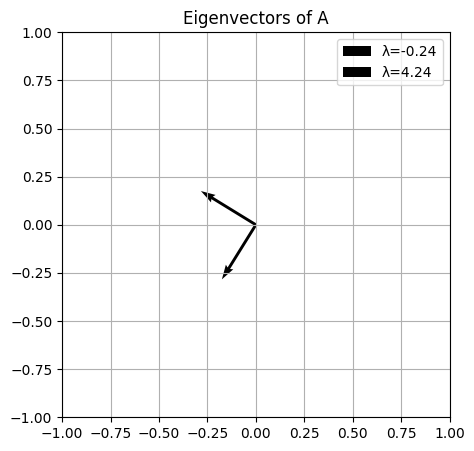

In [18]:
A = torch.tensor([[1, 2], [2, 3]], dtype=torch.float64)
eigenvalues, eigenvectors = torch.linalg.eig(A)
print("Matrix A:")
print(A)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

# Plotting
plt.figure(figsize=(5, 5))

# Origin for the quiver plot
origin = [0, 0]

# Check if the eigenvectors are complex
if torch.is_complex(eigenvectors):
    # Optional: Convert complex eigenvectors to their real part for plotting
    eigenvectors = eigenvectors.real

# Plot each eigenvector
for i in range(eigenvectors.shape[1]):
    plt.quiver(*origin, eigenvectors[0, i].item(), eigenvectors[1, i].item(), scale=3, scale_units='xy', angles='xy', label=f'λ={eigenvalues[i].real:.2f}')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.title('Eigenvectors of A')
plt.legend()
plt.show()

TODO: 

Similarity metrics for vector search:
https://tivadardanka.com/blog/how-the-dot-product-measures-similarity
https://zilliz.com/blog/similarity-metrics-for-vector-search



References:
https://betterexplained.com/articles/vector-calculus-understanding-the-dot-product/
https://web.stanford.edu/class/nbio228-01/handouts/Ch4_Linear_Algebra.pdf
https://pillowlab.princeton.edu/teaching/statneuro2018/slides/notes03a_SVDandLinSys.pdf
https://pillowlab.princeton.edu/teaching/statneuro2020/
https://linear.axler.net/LinearAbridged.pdf
https://math.unm.edu/~loring/links/linear_s06/nullity.pdf 
https://people.tamu.edu/~f-narcowich//psfiles/find_bases.pdf
